In [2]:
#Importar librerías

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

Lectura de archivo CSV

In [4]:
FILENAME = 'datasets/articles_data_homeproject.csv'

# Especificar columna indice
data = pd.read_csv(FILENAME, index_col=0)

# Mostrar el encabezado de nuestro dataframe
data.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


### Mostrar encavezado con N elementos

In [8]:
#La función head puede recibir el número de elementos que puedes visualizar (5 por default)
data.head(2)


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0


Visualizar el tipo de datos en nuestro dataframe

In [10]:
data.dtypes

source_id                           object
source_name                         object
author                              object
title                               object
description                         object
url                                 object
url_to_image                        object
published_at                        object
content                             object
top_article                        float64
engagement_reaction_count          float64
engagement_comment_count           float64
engagement_share_count             float64
engagement_comment_plugin_count    float64
dtype: object

In [13]:
#La función para saber cuántos campos no tienen información
data.isnull().sum().to_frame()

,0
source_id,0
source_name,0
author,1020
title,2
description,24
url,1
url_to_image,656
published_at,1
content,1292
top_article,2


Análisis de datos

Saber cuáles de los diferentes sitios web tienen más interacción

In [20]:
#Seleccionamos las columnas base para nuestro análisis
COLUMNS = [
    'source_name',
    'author',
    'engagement_reaction_count',
    'engagement_share_count',
    'engagement_comment_plugin_count'
]

#limpiar las filas que tienen un valor nulo en las columnas seleccionadas
data = data[COLUMNS].dropna(axis=0, how='any')

In [27]:
#agrupar por algún tipo de filtro - agrúpa por source name y luego suma por engagement reaction count
engagement_reaction_count = grouped_sum = data.groupby('source_name')['engagement_reaction_count'].sum()
engagement_reaction_count.to_frame()


,engagement_reaction_count
source_name,
ABC News,342936.0
Al Jazeera English,139383.0
BBC News,516902.0
Business Insider,216545.0
CBS News,459741.0
CNN,1188131.0
ESPN,0.0
Newsweek,93167.0
Reuters,16963.0


In [29]:
engagement_share_count = grouped_sum = data.groupby('source_name')['engagement_share_count'].sum()
engagement_share_count.to_frame()

,engagement_share_count
source_name,
ABC News,82335.0
Al Jazeera English,35345.0
BBC News,193389.0
Business Insider,311678.0
CBS News,108152.0
CNN,305454.0
ESPN,0.0
Newsweek,29067.0
Reuters,647095.0


In [33]:
# extraer nueva serie

highest_source = data['source_name'].value_counts()
type(highest_source)
highest_source.to_frame()

,count
source_name,
Reuters,1252
ABC News,1137
Business Insider,1048
The Irish Times,993
CNN,961
CBS News,941
The New York Times,869
BBC News,746
Newsweek,539


Visualización de Datos

In [38]:
#Seleccionamos el "valor" de la primer columna (índice) y lo convertimos a una lista

highest_source_labels = list(highest_source.index.values)

print(labels)

['Reuters', 'ABC News', 'Business Insider', 'The Irish Times', 'CNN', 'CBS News', 'The New York Times', 'BBC News', 'Newsweek', 'Al Jazeera English', 'The Wall Street Journal', 'ESPN']


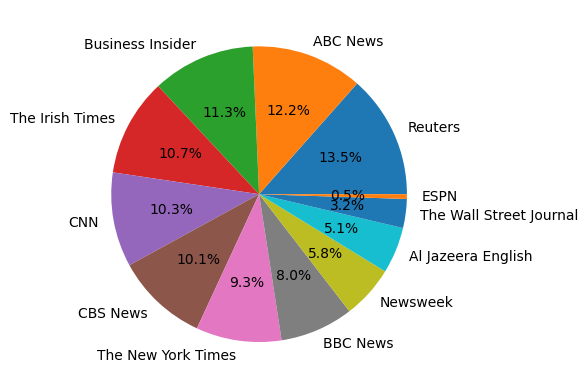

In [44]:
#Crear gráfica de pastel

plt.pie(highest_source, labels=highest_source_labels, autopct='%1.1f%%')
plt.show()